Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [53]:
dictionary = pd.read_csv("dictionary.csv")
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")

Inspect first few rows to ensure proper load


In [54]:
print("Dictionary preview:")
display(dictionary.head())

Dictionary preview:


,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [55]:
print("Summer preview:")
display(summer.head())

Summer preview:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [56]:
print("Winter preview:")
display(winter.head())

Winter preview:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


Check for missing values

In [57]:
print("Missing values in dictionary:")
print(dictionary.isna().sum())

Missing values in dictionary:
Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64


In [58]:
print("Missing values in summer:")
print(summer.isna().sum())

Missing values in summer:
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64


In [59]:
print("Missing values in winter:")
print(winter.isna().sum())

Missing values in winter:
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64


Handling Missing Values

Drop rows with missing country codes or medals

In [60]:
dictionary = dictionary.dropna(subset=["Code"])
summer = summer.dropna(subset=["Country", "Medal"])
winter = winter.dropna(subset=["Country", "Medal"])

Standardize country codes

In [61]:
dictionary["Code"] = dictionary["Code"].str.strip().str.upper()
summer["Country"] = summer["Country"].str.strip().str.upper()
winter["Country"] = winter["Country"].str.strip().str.upper()

Filter out irrelevant columns

In [62]:
dictionary = dictionary[["Country", "Code", "Population", "GDP per Capita"]]

summer = summer[["Year", "Country", "Sport", "Event", "Medal"]]
winter = winter[["Year", "Country", "Sport", "Event", "Medal"]]

Host Country Indicator

In [63]:
hosts = {
    1896: "GRE", #Greece
    1900: "FRA", #France
    1904: "USA", #United States
    1908: "GBR",
    1912:"SWE",
    1916:"GER",
    1920:"BEL",
    1924:"FRA",
    1928:"SWZ",
    1932:"USA",
    1936:"GER",
    1948:"SWZ",
    1952:"NOR",
    1956:"ITA",
    1956:"AUS",
    1960:"USA",
    1960:"ITA",
    1964:"AUS",
    1964:"JPN",
    1968:"FRA",
    1968:"MEX",
    1972:"JPN",
    1972:"GER",
    1976:"AUS",
    1976:"CAN",
    1980:"USA",
    1980:"RUS",
    1984:"USA",
    1988:"CAN",
    1988:"KOR",
    1992:"FRA",
    1992:"ESP",
    1994:"NOR",
    1996:"USA",
    1998:"JPN",
    2000:"AUS",
    2002:"USA",
    2004:"GRE",
    2006:"ITA",
    2008:"CHN",
    2010:"CAN",
    2012:"GBR",
}

summer["Host_Flag"] = summer.apply(lambda row: 1 if hosts.get(row["Year"]) == row["Country"] else 0, axis=1)
winter["Host_Flag"] = winter.apply(lambda row: 1 if hosts.get(row["Year"]) == row["Country"] else 0, axis=1)

Aggregate summer and winter medals


In [64]:
summer_medals = summer.groupby(["Year", "Country", "Host_Flag"]).agg(
    Total_Medals=("Medal", "count"),
    Gold_Medals=("Medal", lambda x: (x == "Gold").sum())
).reset_index()

winter_medals = winter.groupby(["Year", "Country", "Host_Flag"]).agg(
    Total_Medals=("Medal", "count"),
    Gold_Medals=("Medal", lambda x: (x == "Gold").sum())
).reset_index()

print("Summer medals summary:")
display(summer_medals.head())

print("Winter medals summary:")
display(winter_medals.head())



Summer medals summary:


,Year,Country,Host_Flag,Total_Medals,Gold_Medals
0,1896,AUS,0,2,2
1,1896,AUT,0,5,2
2,1896,DEN,0,6,1
3,1896,FRA,0,11,5
4,1896,GBR,0,7,2


Winter medals summary:


,Year,Country,Host_Flag,Total_Medals,Gold_Medals
0,1924,AUT,0,4,3
1,1924,BEL,0,5,0
2,1924,CAN,0,9,9
3,1924,FIN,0,15,4
4,1924,FRA,1,12,0


Medal Boost analysis(How many medals does a country win when it is the host compared to the immediately prior and following Olympics? )

Merge Sumemr and and Winter medals

In [65]:
all_medals = pd.concat([summer_medals, winter_medals], ignore_index=True)

Filter only host years

In [66]:
hosts_data = all_medals[all_medals["Host_Flag"] == 1].copy()
hosts_data = hosts_data.sort_values(by="Year")

display(hosts_data.head())

,Year,Country,Host_Flag,Total_Medals,Gold_Medals
6,1896,GRE,1,52,10
19,1900,FRA,1,185,46
39,1904,USA,1,394,146
49,1908,GBR,1,347,144
76,1912,SWE,1,173,86


In [67]:
def get_medal_boost(df, country, year):
    host_medals = df[(df["Country"] == country) & (df["Year"] == year)]["Total_Medals"].values
    prev_medals = df[(df["Country"] == country) & (df["Year"] == (year - 4))]["Total_Medals"].values
    next_medals = df[(df["Country"] == country) & (df["Year"] == (year + 4))]["Total_Medals"].values
    
    return {
        "Country": country,
        "Host_Year": year,
        "Prev_Medals": prev_medals[0] if len(prev_medals) > 0 else np.nan,
        "Host_Medals": host_medals[0] if len(host_medals) > 0 else np.nan,
        "Next_Medals": next_medals[0] if len(next_medals) > 0 else np.nan
    }

boost_records = []
for _, row in hosts_data.iterrows():
    boost_records.append(get_medal_boost(all_medals, row["Country"], row["Year"]))

boost_df = pd.DataFrame(boost_records)
display(boost_df)

,Country,Host_Year,Prev_Medals,Host_Medals,Next_Medals
0,GRE,1896,NaN,52,NaN
1,FRA,1900,11.0,185,NaN
2,USA,1904,55.0,394,63.0
3,GBR,1908,2.0,347,160.0
4,SWE,1912,98.0,173,NaN
5,BEL,1920,NaN,188,38.0
6,FRA,1924,141.0,122,36.0
7,FRA,1924,141.0,122,36.0
8,USA,1932,84.0,181,92.0
9,USA,1932,84.0,181,92.0


Visualize medal boost using line graph

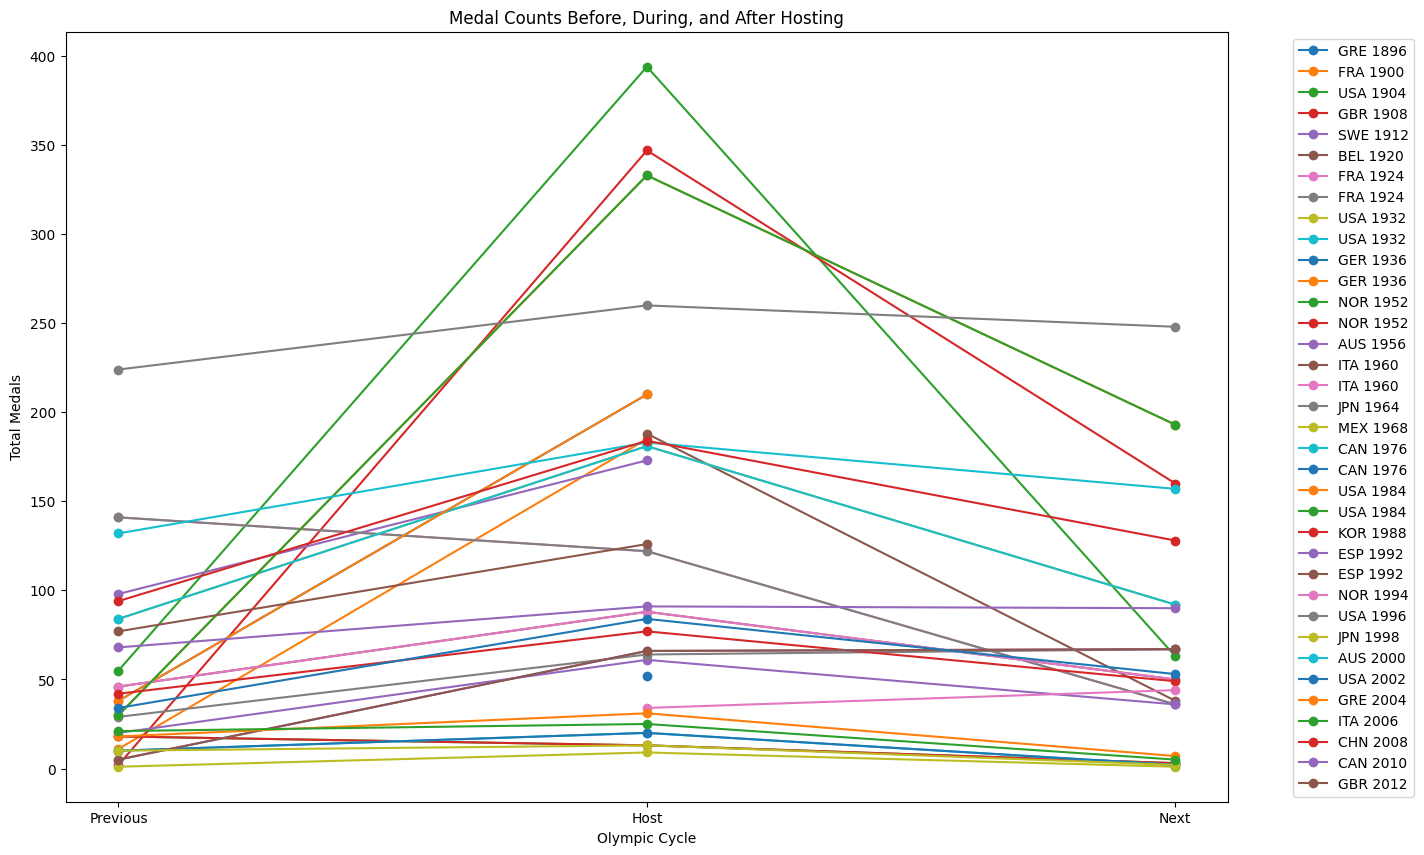

In [69]:
plt.figure(figsize=(15,10))
for _, row in boost_df.iterrows():
    plt.plot(
        ["Previous", "Host", "Next"],
        [row["Prev_Medals"], row["Host_Medals"], row["Next_Medals"]],
        marker="o",
        label=row["Country"] + " " + str(row["Host_Year"])
    )
plt.title("Medal Counts Before, During, and After Hosting")
plt.xlabel("Olympic Cycle")
plt.ylabel("Total Medals")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
